In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

In [2]:
mon=pd.read_csv(   'data/monday.csv', sep=';')
tue=pd.read_csv(  'data/tuesday.csv', sep=';')
wed=pd.read_csv('data/wednesday.csv', sep=';')
thu=pd.read_csv( 'data/thursday.csv', sep=';')
fri=pd.read_csv(   'data/friday.csv', sep=';')

week = [mon, tue, wed, thu, fri]
working_days = ["mon", "tue", "wed", "thu", "fri"]

In [3]:
def smoothen_data(daily_df):
    all_customers    = set(daily_df.customer_no.values)
    co_customers     = set(daily_df[daily_df["location"]=="checkout"].customer_no.values)
    non_co_customers = list(all_customers.difference(co_customers))

    for cust in non_co_customers:
            daily_df=daily_df.append({"timestamp":daily_df['timestamp'].str.extract('(^\S*)')[0][0] +' '+ "22:00:00", "customer_no":cust,"location":"checkout"},ignore_index=True)
            #daily_df=daily_df.concat({"timestamp":daily_df['timestamp'].str.extract('(^\S*)')[0][0] +' '+ "22:00:00", "customer_no":cust,"location":"checkout"},ignore_index=True)
    return daily_df

In [4]:
for i in range(len(week)):
    week[i] = smoothen_data(week[i])

In [5]:
for i in range(len(week)):
    week[i]["customer_no"]=week[i]["customer_no"].apply(lambda x:str(x)+'_'+working_days[i])
    week[i]["day"]=working_days[i]

In [6]:
week[1].tail(20)

,timestamp,customer_no,location,day
4696,2019-09-03 21:42:00,1409_tue,checkout,tue
4697,2019-09-03 21:42:00,1411_tue,fruit,tue
4698,2019-09-03 21:42:00,1419_tue,fruit,tue
4699,2019-09-03 21:43:00,1412_tue,spices,tue
4700,2019-09-03 21:43:00,1418_tue,checkout,tue
4701,2019-09-03 21:43:00,1419_tue,checkout,tue
4702,2019-09-03 21:43:00,1420_tue,drinks,tue
4703,2019-09-03 21:44:00,1403_tue,drinks,tue
4704,2019-09-03 21:44:00,1412_tue,drinks,tue
4705,2019-09-03 21:46:00,1403_tue,checkout,tue


In [7]:
print(type(mon['timestamp'][0]))

<class 'str'>


str type is not useful for us. We need to cast it to datetime type to be able to make use of it.

In [8]:
for day in week:
    # set timestamp as datetime and index as well
    day.timestamp = pd.to_datetime(day.timestamp)
    day.set_index("timestamp", inplace=True)
    
# let's start working on metadata of the dataframe
# for day in week:
    # adding a customer count
#    day["nr_loc"] = day.groupby("customer_no").cumcount()
#    day["add"]   = day.loc[:, "nr_loc"].transform(lambda x: 1 if x == 0 else 0)
#    add_customer = day.loc[:, "nr_loc"].transform(lambda x: 1 if x == 0 else 0)
#    day["del"]   = day.loc[:, "location"].transform(lambda x: -1 if x == "checkout" else 0)
#    del_customer = day.loc[:, "location"].transform(lambda x: -1 if x == "checkout" else 0)
#    day["net"] = add_customer + del_customer
#    day["cust_total"] = day.loc[:, "net"].cumsum()

In [10]:
df_week = pd.concat([week[0],week[1],week[2],week[3],week[4]])

In [13]:
df_week

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1_mon,dairy,mon
2019-09-02 07:03:00,2_mon,dairy,mon
2019-09-02 07:04:00,3_mon,dairy,mon
2019-09-02 07:04:00,4_mon,dairy,mon
2019-09-02 07:04:00,5_mon,spices,mon
...,...,...,...
2019-09-06 22:00:00,1510_fri,checkout,fri
2019-09-06 22:00:00,1494_fri,checkout,fri
2019-09-06 22:00:00,1496_fri,checkout,fri


### Calculate the total number of customers in each section

In [17]:
df_week.groupby("location")["customer_no"].count()

location
checkout    7445
dairy       4679
drinks      3905
fruit       5122
spices      3754
Name: customer_no, dtype: int64

<AxesSubplot:ylabel='customer_no'>

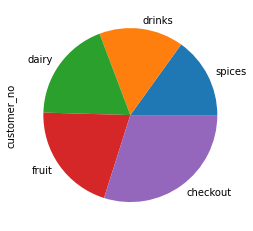

In [18]:
df_week.groupby("location")["customer_no"].count().sort_values(ascending=True).plot.pie()

### Calculate the total number of customers in each section over time

<AxesSubplot:xlabel='location,timestamp'>

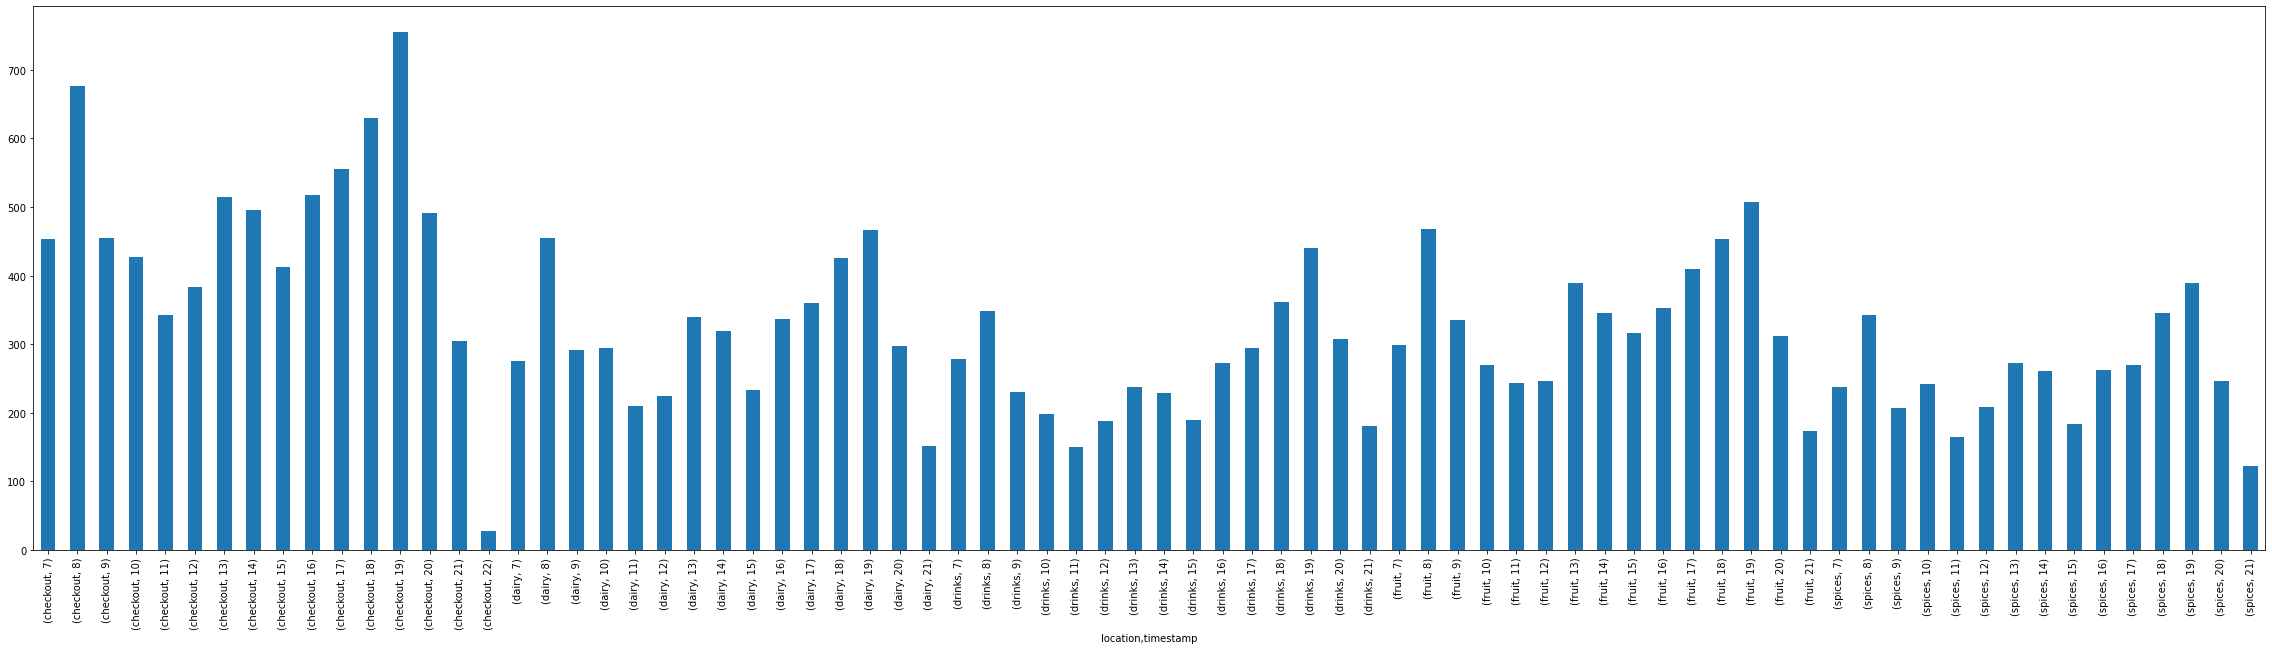

In [44]:
# The plot is here to give a taste of rush hours at each section for any day. The plot is not grouped by wrt day.
plt.figure(figsize=(40,10))
df_week.groupby(by=["location",df_week.index.hour])["customer_no"].count().plot.bar()

In [60]:
df_week.groupby(by=[df_week.location,df_week.index.day,df_week.index.hour])["customer_no"].count().head(40)



location  timestamp  timestamp
checkout  2          7             92
                     8            112
                     9             85
                     10            90
                     11            55
                     12            73
                     13           120
                     14            90
                     15            94
                     16            86
                     17           122
                     18           128
                     19           129
                     20           109
                     21            52
                     22            10
          3          7             91
                     8            129
                     9             77
                     10            81
                     11            47
                     12            60
                     13           104
                     14           110
                     15            72
                   

### Calculate the number of customers at checkout over time

In [78]:
df_checkout = df_week[df_week["location"]=="checkout"]

In [87]:
df_checkout.groupby(by=[df_checkout.index.day, df_checkout.index.hour])["customer_no"].count()

timestamp  timestamp
2          7             92
           8            112
           9             85
           10            90
           11            55
                       ... 
6          18           148
           19           135
           20           103
           21            52
           22             8
Name: customer_no, Length: 80, dtype: int64

<AxesSubplot:xlabel='timestamp'>

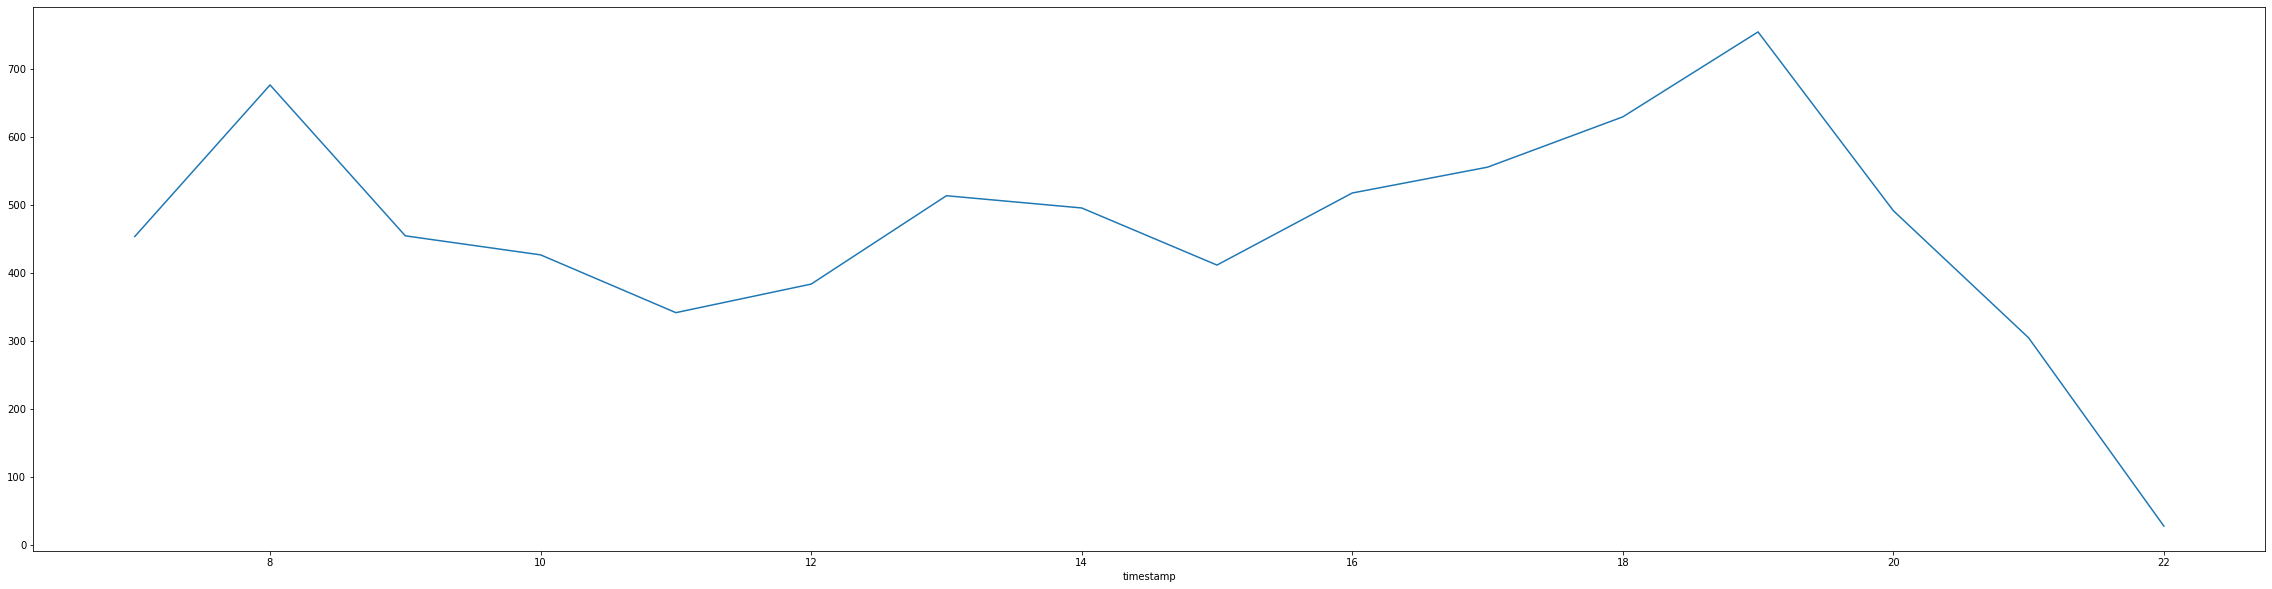

In [128]:
plt.figure(figsize=(40,10))
df_checkout.groupby(by=[df_checkout.index.hour])["customer_no"].count().plot.line()

<AxesSubplot:xlabel='timestamp,timestamp'>

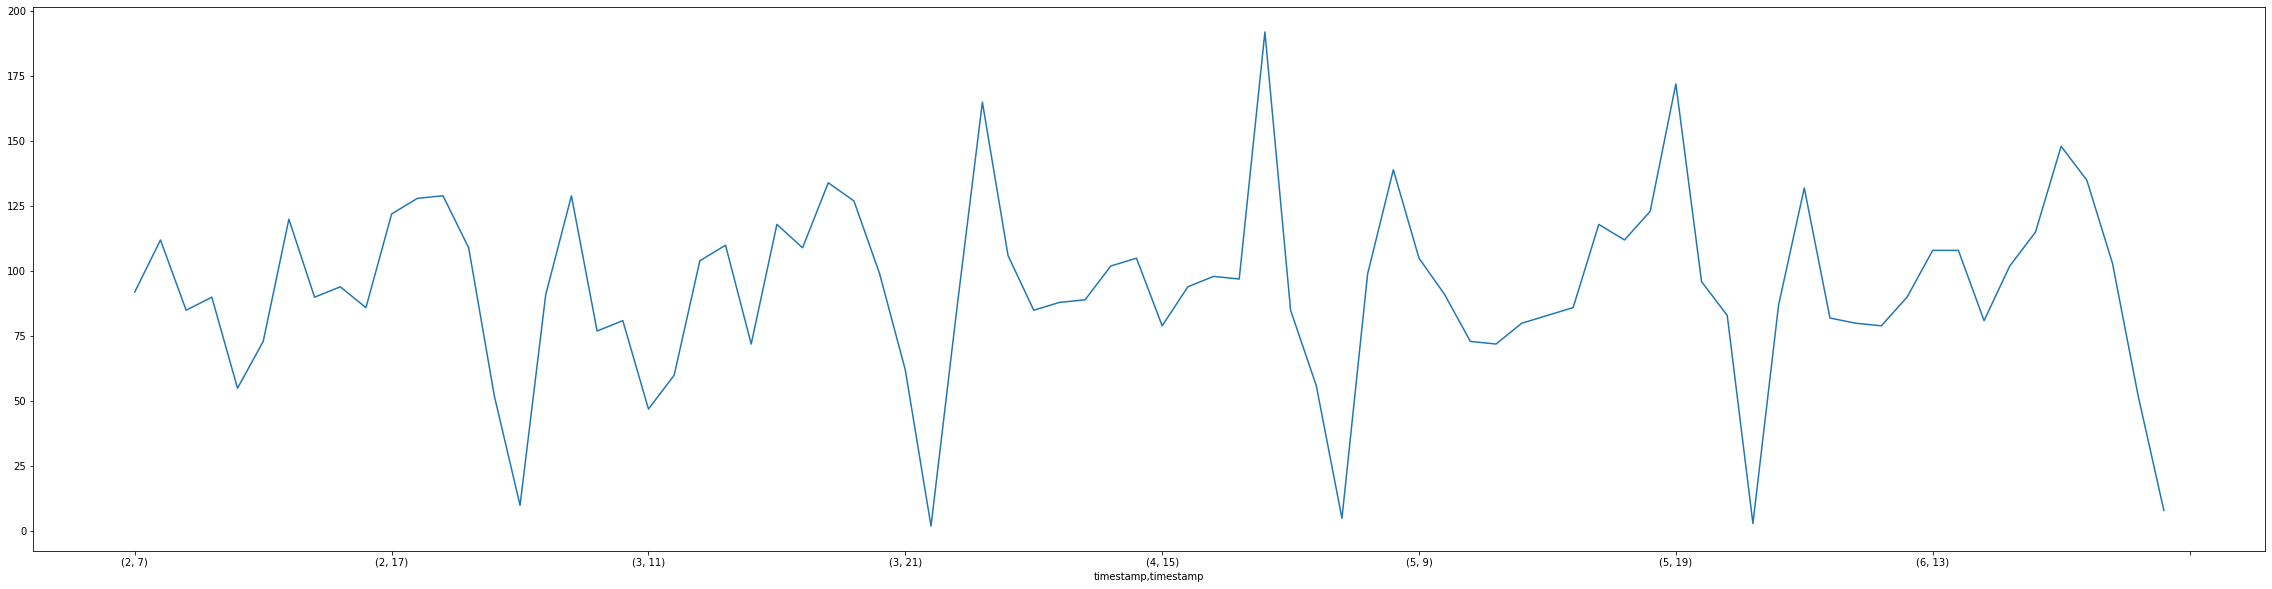

In [129]:
plt.figure(figsize=(40,10))
df_checkout.groupby(by=[df_checkout.index.day,df_checkout.index.hour])["customer_no"].count().plot.line()

<AxesSubplot:xlabel='location,timestamp'>

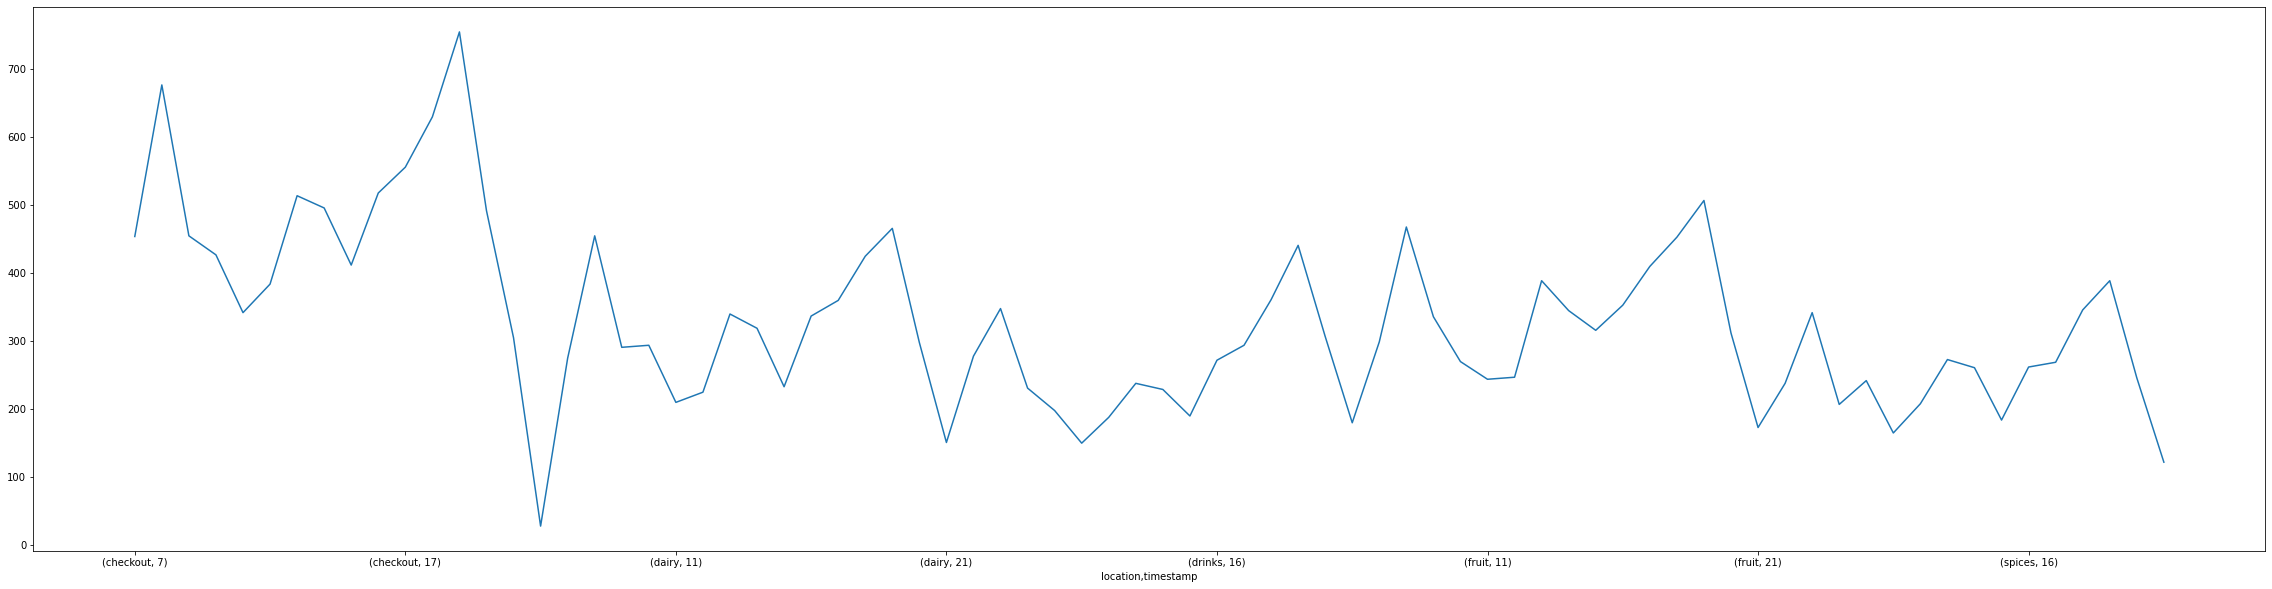

In [105]:
plt.figure(figsize=(40,10))
df_week.groupby(by=[df_week.location,df_week.index.hour])["customer_no"].count().plot.()

*** The plot above can be presented in a way better way using sns. ***

In [107]:
df_spacetime=df_week.groupby(['location',df_week.index.hour])['customer_no'].count().to_frame().reset_index()

In [110]:
df_spacetime

,location,timestamp,customer_no
0,checkout,7,454
1,checkout,8,677
2,checkout,9,455
3,checkout,10,427
4,checkout,11,342
...,...,...,...
71,spices,17,269
72,spices,18,346
73,spices,19,389
74,spices,20,246


In [111]:
df_spacetime.rename(columns={"timestamp":"hour"},inplace=True)

In [112]:
df_spacetime

,location,hour,customer_no
0,checkout,7,454
1,checkout,8,677
2,checkout,9,455
3,checkout,10,427
4,checkout,11,342
...,...,...,...
71,spices,17,269
72,spices,18,346
73,spices,19,389
74,spices,20,246


[None, None]

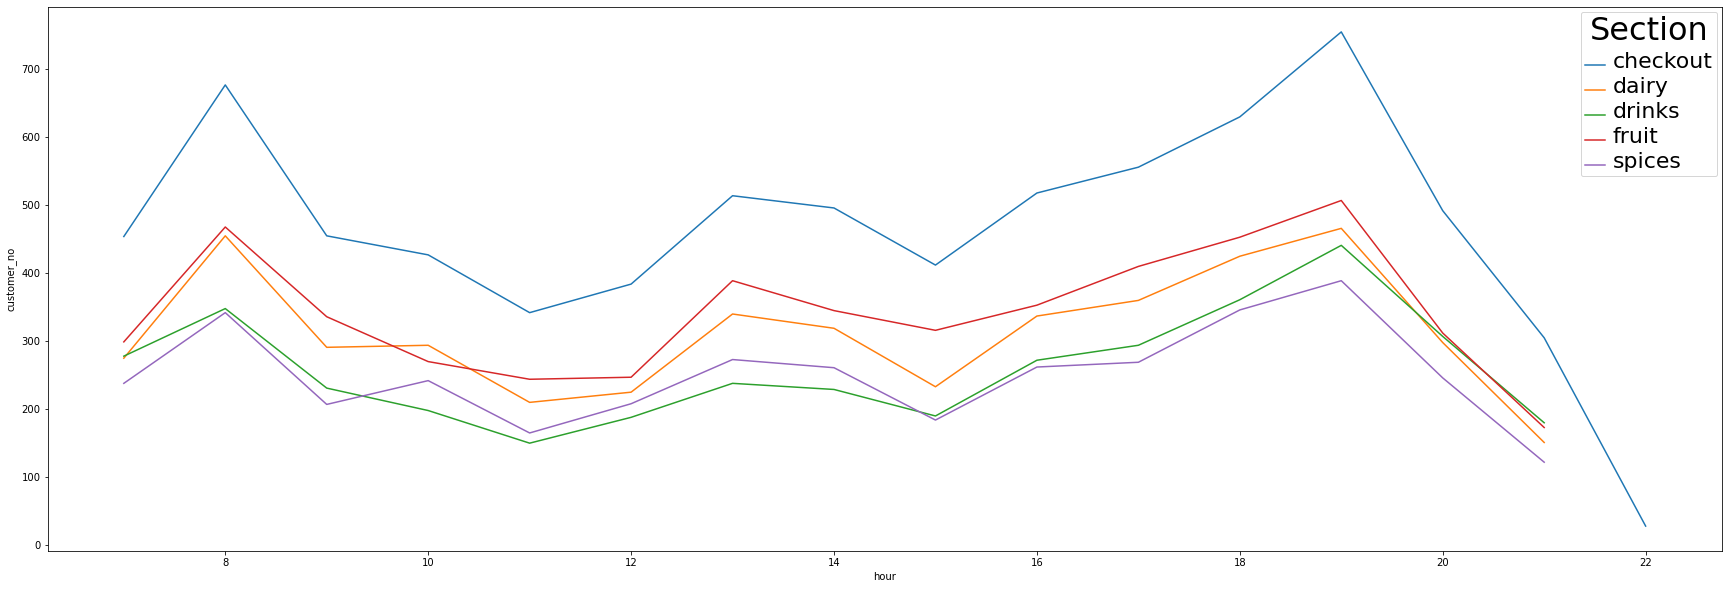

In [124]:
plt.figure(figsize=(30,10))
ax = sns.lineplot(y="customer_no",x="hour",data=df_spacetime, hue="location")
plt.legend(title='Section', loc='upper right')
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

### Display the number of customers at checkout over time

Done above.

### Calculate the time each customer spent in the market

In [130]:
time_ = df_week.reset_index()

In [134]:
time_.columns

Index(['timestamp', 'customer_no', 'location', 'day'], dtype='object')

In [145]:
time_

,timestamp,customer_no,location,day
0,2019-09-02 07:03:00,1_mon,dairy,mon
1,2019-09-02 07:03:00,2_mon,dairy,mon
2,2019-09-02 07:04:00,3_mon,dairy,mon
3,2019-09-02 07:04:00,4_mon,dairy,mon
4,2019-09-02 07:04:00,5_mon,spices,mon
...,...,...,...,...
24900,2019-09-06 22:00:00,1510_fri,checkout,fri
24901,2019-09-06 22:00:00,1494_fri,checkout,fri
24902,2019-09-06 22:00:00,1496_fri,checkout,fri
24903,2019-09-06 22:00:00,1500_fri,checkout,fri


In [143]:
time_spent = ( time_.groupby(["customer_no", "day"])[["timestamp"]].last() -
               time_.groupby(["customer_no", "day"])[["timestamp"]].first())

In [144]:
time_spent

,,timestamp
customer_no,day,
1000_fri,fri,0 days 00:01:00
1000_mon,mon,0 days 00:07:00
1000_thu,thu,0 days 00:10:00
1000_tue,tue,0 days 00:04:00
1000_wed,wed,0 days 00:13:00
...,...,...
9_fri,fri,0 days 00:03:00
9_mon,mon,0 days 00:07:00
9_thu,thu,0 days 00:02:00


In [150]:
time_spent["time_spent"] = time_spent.timestamp.dt.seconds / 60

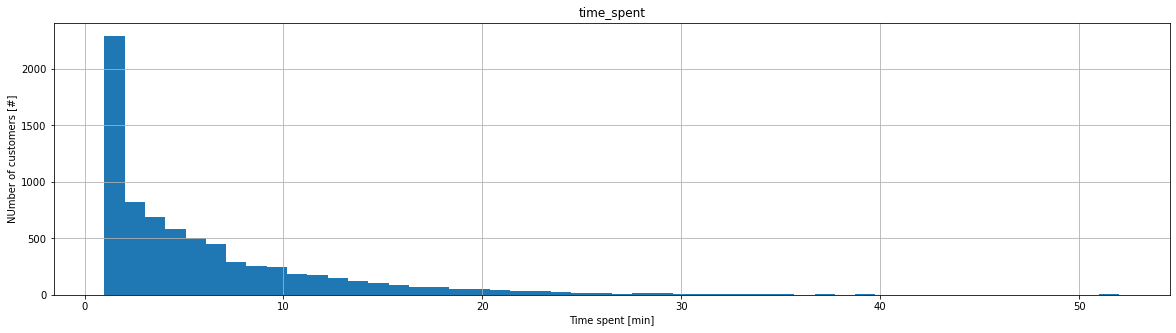

In [160]:
time_spent.hist(column="time_spent", figsize=(20,5), bins=50)
plt.xlabel("Time spent [min]")
plt.ylabel("NUmber of customers [#]")
plt.show()

### Calculate the total number of customers present in the supermarket over time.
(Make sure each customer enters the supermarket only once)

In [164]:
df_week.groupby([df_week.index.hour])["customer_no"].count()

timestamp
7     1544
8     2290
9     1520
10    1431
11    1111
12    1252
13    1754
14    1650
15    1335
16    1742
17    1889
18    2215
19    2558
20    1655
21     931
22      28
Name: customer_no, dtype: int64

<AxesSubplot:xlabel='timestamp'>

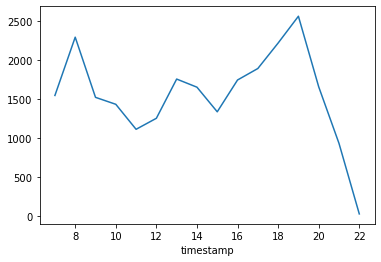

In [163]:
df_week.groupby([df_week.index.hour])["customer_no"].count().plot()

### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [168]:
df_firstsec = time_.groupby('customer_no')["timestamp",'location'].first()

<AxesSubplot:xlabel='location', ylabel='Count'>

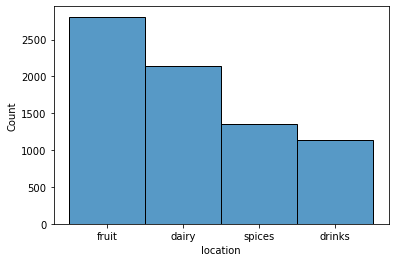

In [177]:
sns.histplot(df_firstsec["location"])

In [181]:
df_firstsec['first']='first'
df_secseq = pd.merge(df_week, df_firstsec, how="left", on=["customer_no", "timestamp",'location'])

df_secseq['first']=df_secseq['first'].fillna('follow')

In [182]:
df_secseq

,customer_no,timestamp,location,day,first
0,1_mon,2019-09-02 07:03:00,dairy,mon,first
1,2_mon,2019-09-02 07:03:00,dairy,mon,first
2,3_mon,2019-09-02 07:04:00,dairy,mon,first
3,4_mon,2019-09-02 07:04:00,dairy,mon,first
4,5_mon,2019-09-02 07:04:00,spices,mon,first
...,...,...,...,...,...
24900,1510_fri,2019-09-06 22:00:00,checkout,fri,follow
24901,1494_fri,2019-09-06 22:00:00,checkout,fri,follow
24902,1496_fri,2019-09-06 22:00:00,checkout,fri,follow
24903,1500_fri,2019-09-06 22:00:00,checkout,fri,follow


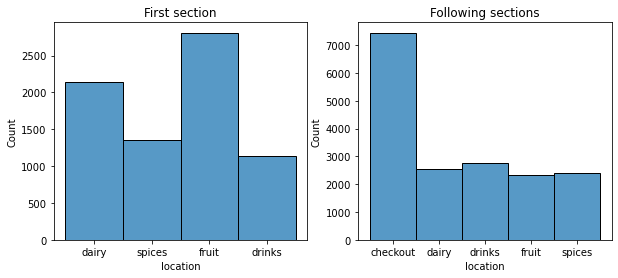

In [191]:
fig,(ax1,ax2)=plt.subplots(ncols=2)
fig.set_size_inches(10, 4)
sns.histplot(x=df_secseq[df_secseq['first']=='first']['location'], data=df_secseq,ax=ax1).set_title('First section')
sns.histplot(x=df_secseq[df_secseq['first']=='follow']['location'], data=df_secseq, ax=ax2).set_title('Following sections');

<AxesSubplot:xlabel='day'>

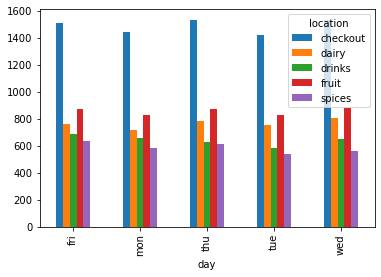

In [188]:
df_week.groupby(['day','location'])['customer_no'].nunique().unstack().plot.bar()